In [2]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

#some settings
sns.set_palette('Paired')

In [3]:
df = pd.read_csv('data/TelcoCustomerChurn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#size of the dataset
df.shape

(7043, 21)

The dataset has 7043 rows and 21 columns.

In [5]:
len(pd.unique(df['customerID']))

7043

Each row represents a user, so we have 7043 distinct users.

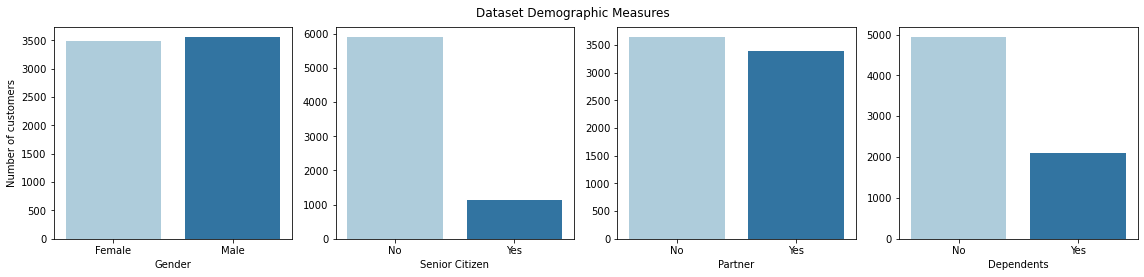

In [6]:
#Demographic measures
fig, ax = plt.subplots(1,4, figsize=(16,4))

ax[0] = sns.countplot(x='gender', data=df, ax=ax[0])
ax[1] = sns.countplot(x='SeniorCitizen', data=df, ax=ax[1])
ax[2] = sns.countplot(x='Partner', data=df, ax=ax[2], order=['No', 'Yes'])
ax[3] = sns.countplot(x='Dependents', data=df, ax=ax[3])

#Labels
ax[1].set_xticklabels(['No','Yes'])
ax[0].set(xlabel='Gender',ylabel='Number of customers')
ax[1].set(xlabel='Senior Citizen',ylabel='')
ax[2].set(xlabel='Partner',ylabel='')
ax[3].set(xlabel='Dependents',ylabel='')

#Title
fig.suptitle('Dataset Demographic Measures', position=(.5,0.95), fontsize=12)
fig.tight_layout()

#Save plot
plt.savefig('images/0_1_demographic_informations.png', dpi=70)

In [7]:
#Number of services subscribed
#List of the different services provided 
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

#Count the number of customer subscribed to each service
services_count = pd.DataFrame(df[df[services].isin(['Yes','DSL','Fiber optic'])][services].count())
services_count.reset_index(inplace=True)
services_count.rename(columns={'index': 'service', 0: 'count'},inplace=True)

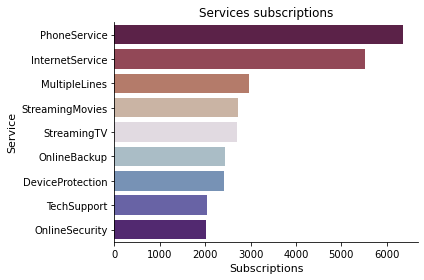

In [8]:
#Display the information
plot1 = sns.barplot(x='count',y='service',data=services_count,order=services_count.sort_values('count',ascending = False).service,palette='twilight_shifted_r')

#Remove the top and right frame
plot1.spines['top'].set_visible(False)
plot1.spines['right'].set_visible(False)
#Insert labels and title
plt.xlabel('Subscriptions', size=11)
plt.ylabel('Service', size=11)
plt.title('Services subscriptions', size=12)
plt.tight_layout()
#Save plot
plt.savefig('images/0_2_services_informations.png', dpi=70)

The company provided 9 services: 
<ul>
<li>PhoneService - Whether the customer has a phone service or not </li>
<li>MultipleLines - Whether the customer has multiple lines or not</li>
<li>InternetService - Customer’s internet service provider (DSL, Fiber optic, None)</li>
<li>OnlineSecurity - Whether the customer has online security</li>
<li>OnlineBackup - Whether the customer has online backup</li>
<li>DeviceProtection - Whether the customer has device protection</li>
<li>TechSupport - Whether the customer has device protection</li>
<li>StreamingTV - Whether the customer has streaming TV</li>
<li>StreamingMovies - Whether the customer has streaming movies</li>
</ul>
The most subscribed services are phone and internet service.

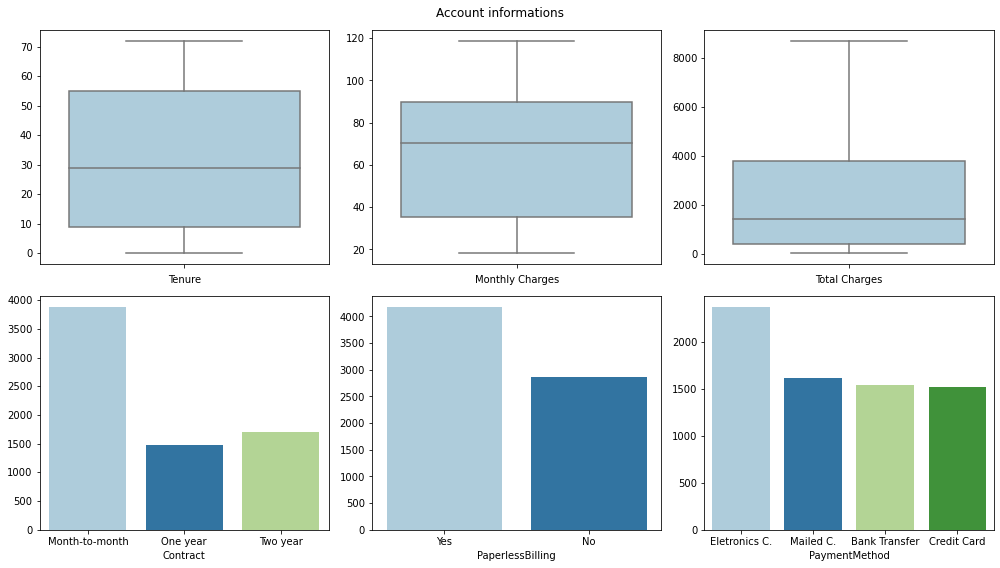

In [9]:
#Account information
#Convert column 'TotalCharges' to numeric
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.NaN).astype(float)

fig, ax = plt.subplots(2,3, figsize=(14,8))
ax[0][0] = sns.boxplot(y='tenure', data=df, ax=ax[0][0])
ax[0][1] = sns.boxplot(y='MonthlyCharges', data=df, ax=ax[0][1])
ax[0][2] = sns.boxplot(y='TotalCharges', data=df, ax=ax[0][2])
ax[1][0] = sns.countplot(x='Contract', data=df, ax=ax[1][0])
ax[1][1] = sns.countplot(x='PaperlessBilling', data=df, ax=ax[1][1])
ax[1][2] = sns.countplot(x='PaymentMethod', data=df, ax=ax[1][2])

#Labels
ax[0][0].set(xlabel='Tenure',ylabel='')
ax[0][1].set(xlabel='Monthly Charges',ylabel='')
ax[0][2].set(xlabel='Total Charges',ylabel='')
ax[1][0].set(ylabel='')
ax[1][1].set(ylabel='')
ax[1][2].set(ylabel='')
ax[1][2].set_xticklabels(['Eletronics C.','Mailed C.','Bank Transfer','Credit Card'])

fig.suptitle('Account informations', position=(.5,0.98), fontsize=12)
fig.tight_layout()

#Save plot
plt.savefig('images/0_3_account_informations.png', dpi=70)